In [39]:
# Прочитайте csv файл (використовуйте функцію read_csv)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bestsellers with categories.csv')

In [2]:
# Виведіть перші п'ять рядків (використовується функція head)

df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# Виведіть розміри датасету (використовуйте атрибут shape)

df.shape

(550, 7)

In [4]:
# Відповідь: Про скільки книг зберігає дані датасет? --> 351 
# df.describe()
len_list = df['Name'].unique()
len(len_list)

351

In [5]:
# Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:

# Name - назва книги
# Author - автор
# User Rating - рейтинг (за 5-бальною шкалою)
# Reviews - кількість відгуків
# Price - ціна (у доларах станом на 2020 рік)
# Year - рік, коли книга потрапила до рейтингу Топ-50
# Genre - жанр

# Для спрощення подальшої роботи давайте трохи підправимо назви змінних. 
# Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. 
# Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, 
# а пробіл замінимо на нижнє підкреслення (snake_style). 
# А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
#==========================================
#==========================================Первинне дослідження даних
#==========================================

In [7]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному 
# зі стовпців (використовуйте функції isna та sum)

df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [8]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні) --> Ні

In [9]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [10]:
# Відповідь: Які є унікальні жанри? --> Non Fiction , Fiction

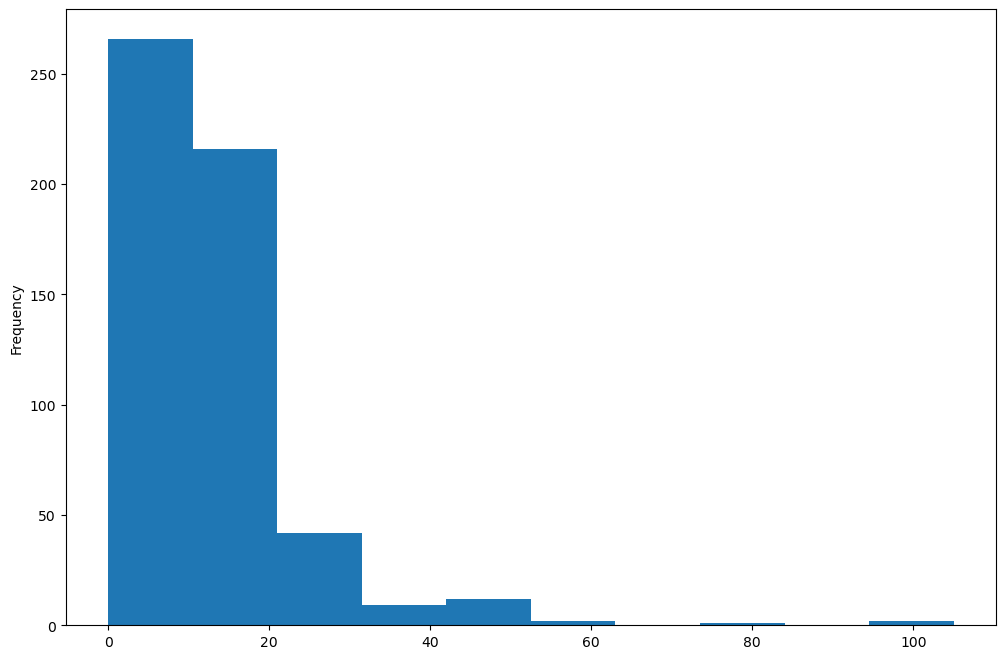

In [11]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

plt.figure(figsize = (12,8))
df['price'].plot(kind='hist')
plt.show()

In [12]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_val = df['price'].max()
min_val = df['price'].min()
mean_val = df['price'].mean()
median_val = df['price'].median()

print(f'Максимальне значення = {max_val}')
print(f'Мінімальне значення = {min_val}')
print(f'Середнє значення = {mean_val}')
print(f'Медіана значення = {median_val}')

Максимальне значення = 105
Мінімальне значення = 0
Середнє значення = 13.1
Медіана значення = 11.0


In [13]:
# Відповідь: Максимальна ціна? --> 105
# Відповідь: Мінімальна ціна?  --> 0
# Відповідь: Середня ціна?     --> 13.1
# Відповідь: Медіанна ціна?    --> 11

In [14]:
#==========================================
#==========================================Пошук та сортування даних
#==========================================

In [15]:
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: --> 4,9
df['user_rating'].max()

4.9

In [16]:
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: --> 52
df[df['user_rating'] == 4.9]['name'].count()

52

In [17]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь: --> Where the Crawdads Sing
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [18]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча 
# (можна використати проміжний датафрейм)? Відповідь: --> 46

df[df['year'] == 2015]['price'].max()


46

In [19]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: --> 20

df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].count()['name']

20

In [20]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках 
# (використовуйте | або функцію isin)? Відповідь: --> 1 

df[(df['user_rating'] == 4.9) & ((df['year']==2010) | (df['year'] == 2011)) ].count()['name']

1

In [21]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році 
# і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

df[(df['price'] < 8) & (df['year'] == 2015)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [22]:
# Відповідь: Яка книга остання у відсортованому списку? Відповідь: --> Old School (Diary of a Wimpy Kid #10)

In [23]:
#==========================================
#==========================================Агрегування даних та з'єднання таблиць
#==========================================

In [24]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). 
# Не беріть усі стовпці, виберіть тільки потрібні вам

df.groupby(['genre'])['price'].agg([np.min, np.max])

,amin,amax
genre,,
Fiction,0,82
Non Fiction,0,105


In [25]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь --> 82
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь --> 0
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь --> 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь --> 0

In [26]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). 
# Не беріть усі стовпці, виберете тільки потрібні

df_cnt_book = df.groupby(['author'])[['name']].count()
df_cnt_book

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [27]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: --> 248 на 1 
df_cnt_book.shape

(248, 1)

In [28]:
# Відповідь: Який автор має найбільше книг? Відповідь: -->  Jeff Kinney
# Відповідь: Скільки книг цього автора? Відповідь: --> 12
df_cnt_book [df_cnt_book['name'] == df_cnt_book['name'].max()]

,name
author,
Jeff Kinney,12


In [29]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 
# Не беріть усі стовпці, виберете тільки потрібні

df_avg_rat = df.groupby(['author'])[['user_rating']].agg(np.mean).round(2)
df_avg_rat

,user_rating
author,
Abraham Verghese,4.60
Adam Gasiewski,4.40
Adam Mansbach,4.80
Adir Levy,4.80
Admiral William H. McRaven,4.70
...,...
Walter Isaacson,4.57
William Davis,4.40
William P. Young,4.60


In [30]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: --> Donna Tartt
# Відповідь: Який у цього автора середній рейтинг? Відповідь: --> 3,9
df_avg_rat[df_avg_rat['user_rating'] == df_avg_rat['user_rating'].min()]

,user_rating
author,
Donna Tartt,3.9


In [31]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

df_concat = pd.concat([df_avg_rat, df_cnt_book], axis=1)
df_concat

,user_rating,name
author,,
Abraham Verghese,4.60,2
Adam Gasiewski,4.40,1
Adam Mansbach,4.80,1
Adir Levy,4.80,1
Admiral William H. McRaven,4.70,1
...,...,...
Walter Isaacson,4.57,3
William Davis,4.40,2
William P. Young,4.60,2


In [32]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

df_concat.sort_values(by=['name', 'user_rating'])

,user_rating,name
author,,
Muriel Barbery,4.00,1
Chris Cleave,4.10,1
Ian K. Smith M.D.,4.10,1
Pierre Dukan,4.10,1
Elizabeth Strout,4.20,1
...,...,...
American Psychological Association,4.50,10
Suzanne Collins,4.66,11
Gary Chapman,4.74,11


In [ ]:
# Відповідь: Який автор перший у списку? --> Muriel Barbery	

In [ ]:
#====================================
#====================================Домашнє завдання модуля 3 (візуалізаціія даних)
#====================================

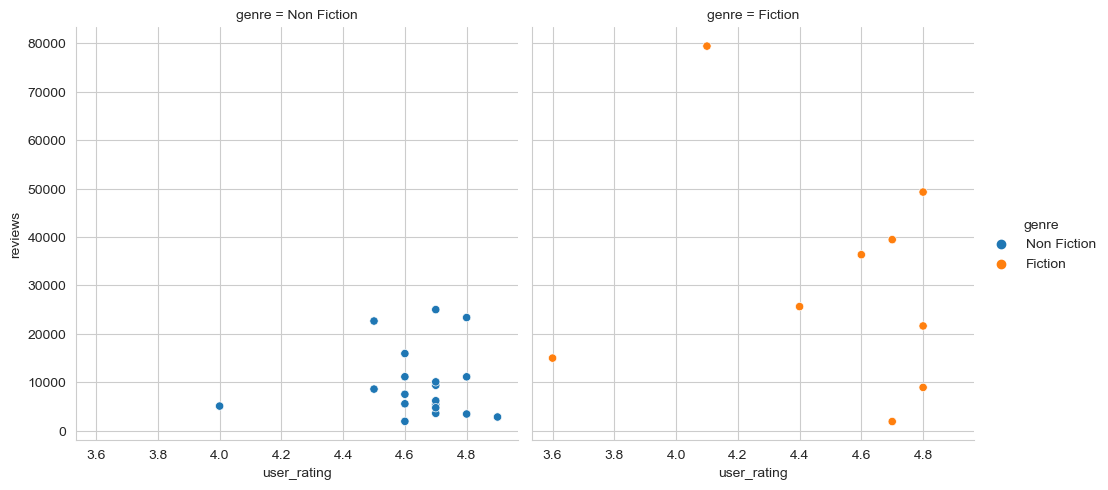

In [67]:
%matplotlib inline
df_new =  df[(df['price'] > 8) & (df['year'] == 2015)].sort_values('price')
sns.relplot(x='user_rating', y='reviews', kind='scatter', hue='genre', col='genre', data=df_new)
plt.show()

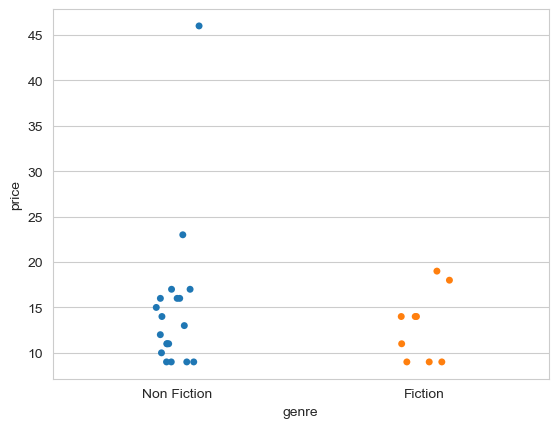

In [68]:
%matplotlib inline
sns.stripplot(x='genre', y='price', data=df_new)
plt.show()

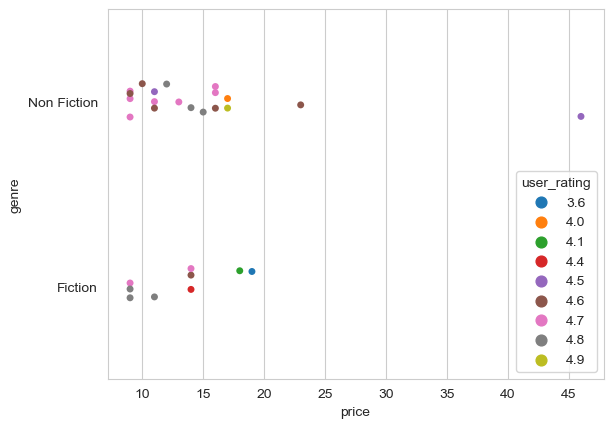

In [70]:
%matplotlib inline
sns.stripplot(x='price', y='genre', hue='user_rating', data=df_new)
plt.show()